# Handwritten Digit Recognition (Binary) / NN and manual

In [1]:
# to suppress TF warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

import sys
sys.path.append('../../')
from ML_toolbox import *

### Load and check data

X.shape: (1000, 400), y.shape: (1000, 1)
X[0] image label is  [0]


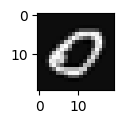

In [2]:
# load dataset
# X are 1000 images of handwritten 0s and 1s, each is 20x20 pixel grayscale image, unrolled into an 400 element vector
# y are labels for what digit each image represents
X = np.load("data/X.npy")[:1000] # original dataset contains images for all digits. First 1000 are 0s and 1s only.
y = np.load("data/y.npy")[:1000]

# check shapes
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

# Checkout one image and its label (reshape into original image size first, and show using a gray cmap)
plt.figure(figsize = (1,1))
plt.imshow(X[0].reshape(20,20), cmap='gray')
print('X[0] image label is ', y[0])
plt.show()

### A function to display an image dataset in a grid with labels and optionally prediction results

In [3]:
def show_image_grid(image_set, y, grid_w=8, grid_h=8, random_index=False, show_predictions=False):
    """
    Show a sample of images a long with their labels.
    random_index: Whether to choose images randomly from the passed image data set
    show_predictions: whether to pass images to the model for prediction and show the prediction results too
    grid_w, grid_h : maximum height and width of the image grid
    """
    img_count = image_set.shape[0]
    if img_count <= grid_w:
        grid_w = img_count
        grid_h = 1
    else:
        grid_h = min(int(img_count/grid_w), grid_h)

    fig, axes = plt.subplots(grid_h, grid_w, figsize=(min(grid_w, 5), min(grid_h, 5)))
    fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

    for i,ax in enumerate(axes.flat):
        if random_index:
            # Select random indices
            index = np.random.randint(img_count)
        else:
            index = i

        # Select rows corresponding to the random indices and
        # reshape the image
        X_random_reshaped = image_set[index].reshape((20,20)).T

        # Display the image
        ax.imshow(X_random_reshaped, cmap='gray')
        if(show_predictions):
            # Predict using the Neural Network
            prediction = model.predict(image_set[index].reshape(1,400))
            if prediction >= 0.5:
                yhat = 1
            else:
                yhat = 0
            # Display the label above the image
            ax.set_title(f"{y[index,0]},{yhat}",fontsize=10)
        else:
            # Display the label above the image
            ax.set_title(f"{y[index,0]}",fontsize=10)
        ax.set_axis_off()
    if(show_predictions):
        fig.suptitle("Label, yhat", fontsize=14)
    else:
        fig.suptitle("Label", fontsize=14)
    plt.show()

### Display a sample of the images and their labels in a grid

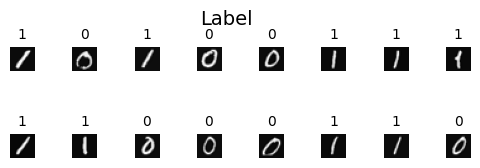

In [4]:
# Choose images randomly and print them in a grid with their labels
show_image_grid(X, y, grid_w=8, grid_h=2, random_index=True, show_predictions=False)

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

### ### Construct --> Compile --> Fit

In [5]:
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size

        Dense(units=25, activation='sigmoid'),
        Dense(units=15, activation='sigmoid'),
        Dense(units=1, activation='sigmoid')
        
    ], name = "my_model" 
)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

# Summary of model
model.summary()

Epoch 1/20
32/32 [==============================] - 1s 6ms/step - loss: 0.6576
Epoch 2/20
32/32 [==============================] - 0s 6ms/step - loss: 0.5231
Epoch 3/20
32/32 [==============================] - 0s 6ms/step - loss: 0.3910
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.2814
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.2060
Epoch 6/20
32/32 [==============================] - 0s 6ms/step - loss: 0.1567
Epoch 7/20
32/32 [==============================] - 0s 6ms/step - loss: 0.1237
Epoch 8/20
32/32 [==============================] - 0s 6ms/step - loss: 0.1000
Epoch 9/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0828
Epoch 10/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0697
Epoch 11/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0598
Epoch 12/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0521
Epoch 13/20
32/32 [==============================

In [6]:
# We can examine the model as follows
# to verify that tensorflow produced the same dimensions as expected
[layer1, layer2, layer3] = model.layers
#### Examine Weights shapes
print('weight shapes in numpy form')
W1,b1 = layer1.get_weights() # returns a numpy array. Use model.layers[0].weights for the tensor form.
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

# tensor from example
print('tensor form weights example')
print(model.layers[2].weights)

weight shapes in numpy form
W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)
tensor form weights example
[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.5620166 ],
       [-0.6874698 ],
       [-0.3683742 ],
       [-0.67709583],
       [ 0.64471626],
       [ 0.49386114],
       [-0.47857276],
       [-0.60613394],
       [ 0.8064618 ],
       [-0.39343402],
       [ 0.3448842 ],
       [ 0.3897019 ],
       [-0.9058305 ],
       [ 0.7739453 ],
       [ 0.43567863]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.16472848], dtype=float32)>]


### Predictions

In [7]:
# Output is a probability of data being a one
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" Prediction (zero labeled img) {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" Prediction: (one labeled img)  {prediction}")
# Threshold these probabilities with 0.5 to get the final prediction output (0 or 1) 

1/1 [==============================] - 0s 162ms/step
 Prediction (zero labeled img) [[0.01560036]]
1/1 [==============================] - 0s 42ms/step
 Prediction: (one labeled img)  [[0.9769208]]


### Show a sample of data with labels and predictions

1/1 [==============================] - 0s 45ms/step


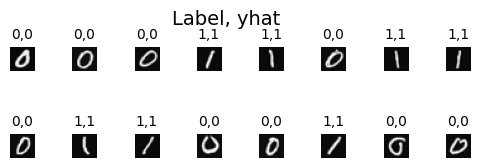

In [8]:
# Show a sample of data with predictions
show_image_grid(X, y, grid_w=8, grid_h=2, random_index=True, show_predictions=True)

### NumPy implementation

In [9]:
def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (ndarray (m,j)) : m examples, j units
    """
    Z = np.matmul(A_in, W) + b
    A_out = g(Z)
    
    return(A_out)

In [10]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [11]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

We can again copy trained weights and biases from Tensorflow.

In [12]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

Let's make a prediction with the new model. This will make a prediction on *all of the examples at once*. Note the shape of the output.

In [13]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

(1000, 1)

We'll apply a threshold of 0.5 as before, but to all predictions at once.

In [14]:
#Yhat = (Prediction >= 0.5).numpy().astype(int)
Yhat = np.where(Prediction >= 0.5, 1, 0)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


Run the following cell to see predictions. This will use the predictions we just calculated above. This takes a moment to run.

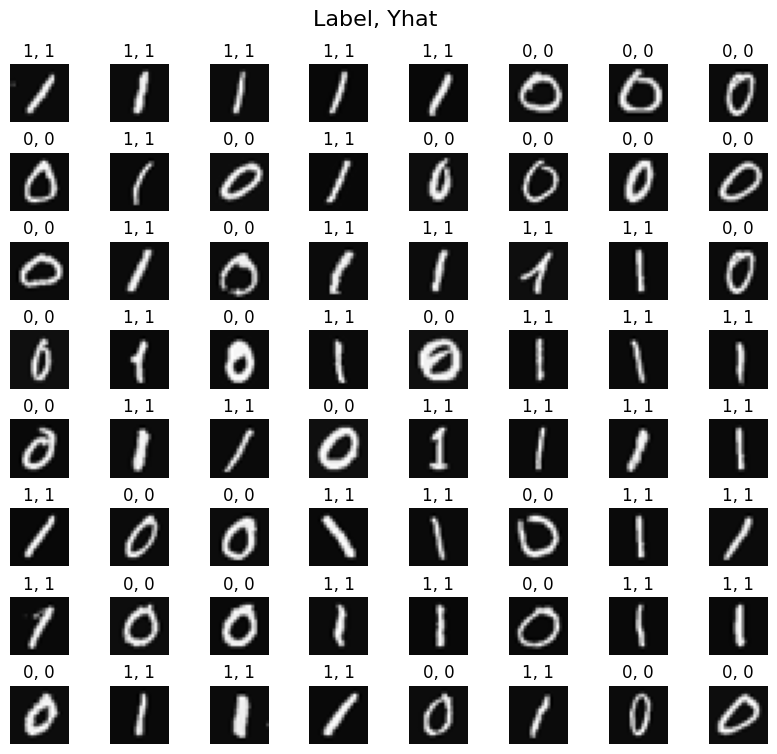

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

You can see how one of the misclassified images looks.

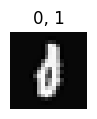

In [16]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()